In [157]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [177]:
lo = pd.read_excel('data/listoforders.xlsm')
od = pd.read_excel('data/orderdetails.xlsm')
tg = pd.read_excel('data/targets.xlsm')

In [19]:
lo.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04 00:00:00,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04 00:00:00,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04 00:00:00,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04 00:00:00,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04 00:00:00,Kasheen,West Bengal,Kolkata


In [20]:
od.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


## Understanding List of Orders and Order Details

In [21]:
lo.describe()

,Order ID,Order Date,CustomerName,State,City
count,500,500,500,500,500
unique,500,307,332,19,24
top,B-25601,24-11-2018,Shreya,Madhya Pradesh,Indore
freq,1,7,6,101,76


In [22]:
lo.isna().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
dtype: int64

In [23]:
lo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [24]:
od.describe(include='O')

,Order ID,Category,Sub-Category
count,1500,1500,1500
unique,500,3,17
top,B-25656,Clothing,Saree
freq,12,949,210


In [25]:
lo['Order Date'] = pd.to_datetime(lo['Order Date'])
lo.head()

,Order ID,Order Date,CustomerName,State,City
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad
1,B-25602,2018-01-04,Pearl,Maharashtra,Pune
2,B-25603,2018-03-04,Jahan,Madhya Pradesh,Bhopal
3,B-25604,2018-03-04,Divsha,Rajasthan,Jaipur
4,B-25605,2018-05-04,Kasheen,West Bengal,Kolkata


In [26]:
od.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275,-1148,7,Furniture,Bookcases
1,B-25601,66,-12,5,Clothing,Stole
2,B-25601,8,-2,3,Clothing,Hankerchief
3,B-25601,80,-56,4,Electronics,Electronic Games
4,B-25602,168,-111,2,Electronics,Phones


## Joining List of orders onto Order Details

In [27]:
df = lo.merge(od, left_on='Order ID', right_on='Order ID')

In [28]:
df.isna().sum()

Order ID        0
Order Date      0
CustomerName    0
State           0
City            0
Amount          0
Profit          0
Quantity        0
Category        0
Sub-Category    0
dtype: int64

In [29]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [30]:
df.to_csv('data/final_data.csv', index=False)

In [31]:
df.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [32]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

In [273]:
df.groupby('Order ID').sum()[['Profit']].nlargest(10, 'Profit')

,Profit
Order ID,
B-25973,1970
B-25855,1432
B-25656,1021
B-26093,1020
B-25761,984
B-25602,975
B-25853,970
B-25923,966
B-26051,906


In [271]:
df.groupby('State').sum()[['Profit']]

,Profit
State,
Andhra Pradesh,-496
Bihar,-321
Delhi,2987
Goa,370
Gujarat,465
Haryana,1325
Himachal Pradesh,656
Jammu and Kashmir,8
Karnataka,645


In [270]:
df.groupby('Category').sum()[['Profit']]

,Profit
Category,
Clothing,11163
Electronics,10494
Furniture,2298


# Sales Trend Analysis

### 1. Profit over a period (monthly)

In [33]:
data = df.copy()

In [34]:
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [35]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones


In [36]:
data['MonthlyDate'] = data['Order Date'].dt.strftime("%Y-%m")

In [216]:
d18 = data[data['Order Date'].dt.year == 2018]
d19 = data[data['Order Date'].dt.year == 2019]

C:\Users\roath\AppData\Local\Temp/ipykernel_8956/2618375102.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.groupby('MonthlyDate').sum()['Profit'].index.values, rotation = 45)


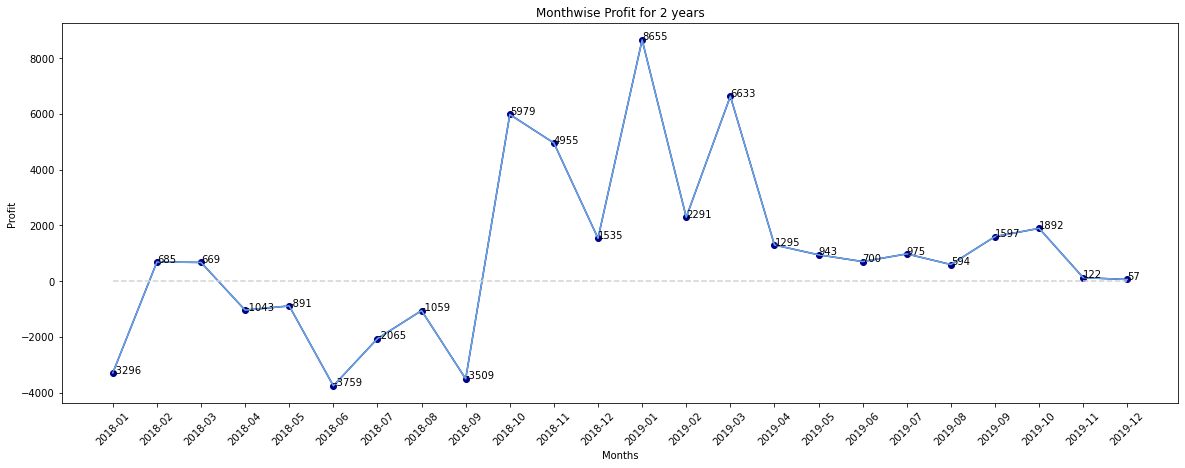

In [274]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(data.groupby('MonthlyDate').sum()['Profit'].index.values,
       data.groupby('MonthlyDate').sum()['Profit'],
       color='darkblue', marker='o')
plt.plot(data.groupby('MonthlyDate').sum()['Profit'], color='#69a7e4')
plt.plot([0]*len(data.groupby('MonthlyDate').sum()['Profit']), color='lightgrey', linestyle='--')
ax.set_xticklabels(data.groupby('MonthlyDate').sum()['Profit'].index.values, rotation = 45)
addlabels(data.groupby('MonthlyDate').sum()['Profit'].index.values, data.groupby('MonthlyDate').sum()['Profit'])
plt.title('Monthwise Profit for 2 years')
plt.xlabel('Months')
plt.ylabel('Profit')
plt.show()

### 2. Profit Trend Analysis

In [240]:
p18 = d18.groupby(d18['Order Date'].dt.month).sum()['Profit']
p19 = d19.groupby(d19['Order Date'].dt.month).sum()['Profit']
total_profit = abs(sum(data['Profit']))

In [286]:
ptrend = data.groupby(data['Order Date'].dt.month).sum()
ptrend['Profit 2018'] = p18
ptrend['Profit 2019'] = p19
ptrend['Profit Contribution% 2018'] = p18/abs(sum(p18)) *100
ptrend['Profit Contribution% 2019'] = p19/abs(sum(p19)) *100
ptrend['Profit growth from 2018 to 2019'] = round((p19 - p18)/abs(p18) * 100, 1)


In [287]:
ptrend = ptrend.reset_index()
ptrend['Order Date'] = ptrend['Order Date'].astype('str')
ptrend.rename(columns=({"Order Date": "Order Month"}), inplace=True)
ptrend.style.background_gradient(cmap='Blues')

,Order Month,Amount,Profit,Quantity,Profit 2018,Profit 2019,Profit Contribution% 2018,Profit Contribution% 2019,Profit growth from 2018 to 2019
0,1,68483,5359,843,-3296,8655,-183.212896,33.606430,362.600000
1,2,22460,2976,311,685,2291,38.076709,8.895706,234.500000
2,3,47134,7302,629,669,6633,37.187326,25.755222,891.500000
3,4,37249,252,443,-1043,1295,-57.976654,5.028345,224.200000
4,5,24812,52,369,-891,943,-49.527515,3.661567,205.800000
5,6,20798,-3059,405,-3759,700,-208.949416,2.718024,118.600000
6,7,20798,-1090,306,-2065,975,-114.785992,3.785820,147.200000
7,8,51826,-465,684,-1059,594,-58.866037,2.306438,156.100000
8,9,25793,-1912,380,-3509,1597,-195.052807,6.200978,145.500000
9,10,46905,7871,563,5979,1892,332.351306,7.346432,-68.400000


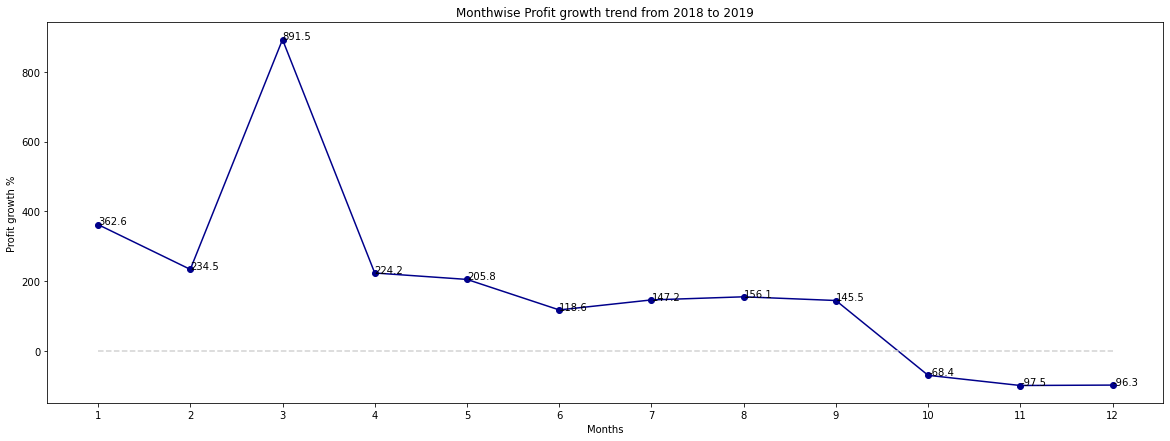

In [290]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.plot(ptrend['Order Month'].values,
       ptrend['Profit growth from 2018 to 2019'],
       color='darkblue', marker='o')
# plt.plot(ptrend['Profit growth from 2018 to 2019'], color='#69a7e4')
plt.plot([0]*len(ptrend['Profit growth from 2018 to 2019']), color='lightgrey', linestyle='--')
addlabels(ptrend['Order Month'].values, ptrend['Profit growth from 2018 to 2019'])
plt.title('Monthwise Profit growth trend from 2018 to 2019')
plt.xlabel('Months')
plt.ylabel('Profit growth %')
plt.show()

### 3. Profit by State

C:\Users\roath\AppData\Local\Temp/ipykernel_8956/3583916969.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.groupby('State').sum()['Profit'].index.values, rotation = 45)


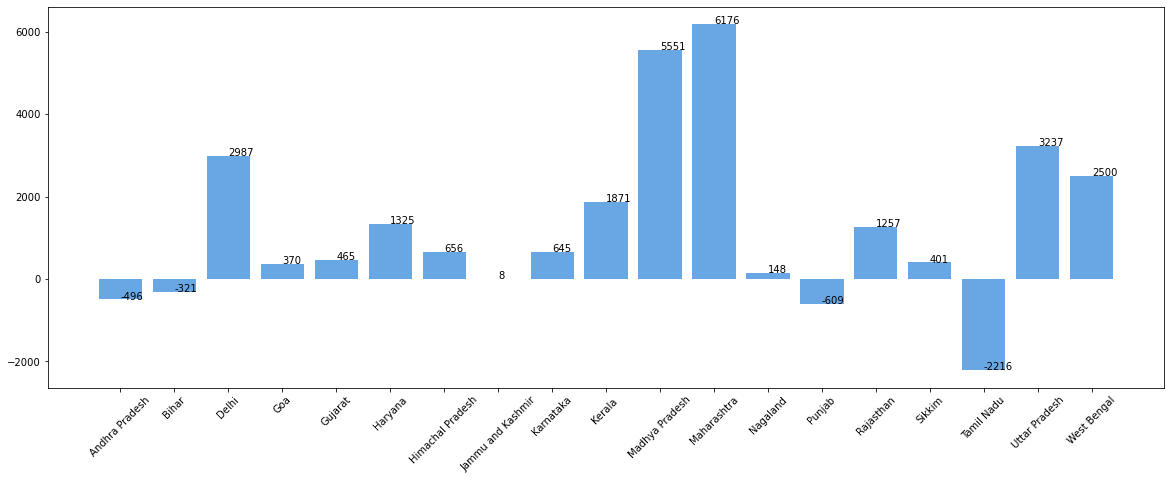

In [38]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(data.groupby('State').sum()['Profit'].index.values,
       data.groupby('State').sum()['Profit'],
       color='#69a7e4')
ax.set_xticklabels(data.groupby('State').sum()['Profit'].index.values, rotation = 45)
addlabels(data.groupby('State').sum()['Profit'].index.values, data.groupby('State').sum()['Profit'])
plt.title('Statewise overall profit')
plt.xlabel('State')
plt.ylabel('Profit')
plt.show()

In [291]:
state_cont = data.groupby('State').sum()['Profit']
state_cont = state_cont.reset_index()
sc18 = d18.groupby('State').sum()['Profit']
sc18 = sc18.reset_index()
sc19 = d19.groupby('State').sum()['Profit']
sc19 = sc19.reset_index()
sc18['Profit Contribution'] = sc18['Profit']/abs(sum(sc18['Profit'])) * 100
sc19['Profit Contribution'] = sc19['Profit']/abs(sum(sc19['Profit'])) * 100

In [292]:
state_cont['Profit Contribution % 2018'] = sc18['Profit Contribution']
state_cont['Profit Contribution % 2019'] = sc19['Profit Contribution']
state_cont['Profit 2018'] = sc18['Profit']
state_cont['Profit 2019'] = sc19['Profit']
state_cont['Profit growth% from 2018 to 2019'] = (state_cont['Profit 2019'] - state_cont['Profit 2018'])/abs(sc18['Profit']) * 100

In [294]:
state_cont.style.background_gradient(cmap='Blues')

,State,Profit,Profit Contribution % 2018,Profit Contribution % 2019,Profit 2018,Profit 2019,Profit growth% from 2018 to 2019
0,Andhra Pradesh,-496,-77.987771,3.521783,-1403,907,164.647185
1,Bihar,-321,-47.637576,2.081230,-857,536,162.543757
2,Delhi,2987,5.892162,11.186612,106,2881,2617.924528
3,Goa,370,16.231240,0.302866,292,78,-73.287671
4,Gujarat,465,-40.689272,4.647822,-732,1197,263.524590
5,Haryana,1325,21.400778,3.649918,385,940,144.155844
6,Himachal Pradesh,656,26.570317,0.691155,478,178,-62.761506
7,Jammu and Kashmir,8,-66.648138,4.686651,-1199,1207,200.667223
8,Karnataka,645,-12.562535,3.381999,-226,871,485.398230
9,Kerala,1871,61.812118,2.947115,1112,759,-31.744604


In [146]:
state_cont['Profit Contribution %'] = state_cont['Profit']/abs(sum(state_cont['Profit'])) * 100

In [215]:
state_cont.nlargest(10, 'Profit growth% from 2018 to 2019').style.background_gradient(cmap='Reds')

,State,Profit,pc 2018,pc 2019,Profit 2018,Profit 2019,Profit growth% from 2018 to 2019
10,Madhya Pradesh,5551,1.278488,21.464627,23,5528,23934.782609
2,Delhi,2987,5.892162,11.186612,106,2881,2617.924528
18,West Bengal,2500,20.622568,8.266677,371,2129,473.854447
17,Uttar Pradesh,3237,50.472485,9.043255,908,2329,156.497797
5,Haryana,1325,21.400778,3.649918,385,940,144.155844
15,Sikkim,401,7.559755,1.028966,136,265,94.852941
11,Maharashtra,6176,127.626459,15.065621,2296,3880,68.989547
9,Kerala,1871,61.812118,2.947115,1112,759,-31.744604
6,Himachal Pradesh,656,26.570317,0.691155,478,178,-62.761506
3,Goa,370,16.231240,0.302866,292,78,-73.287671


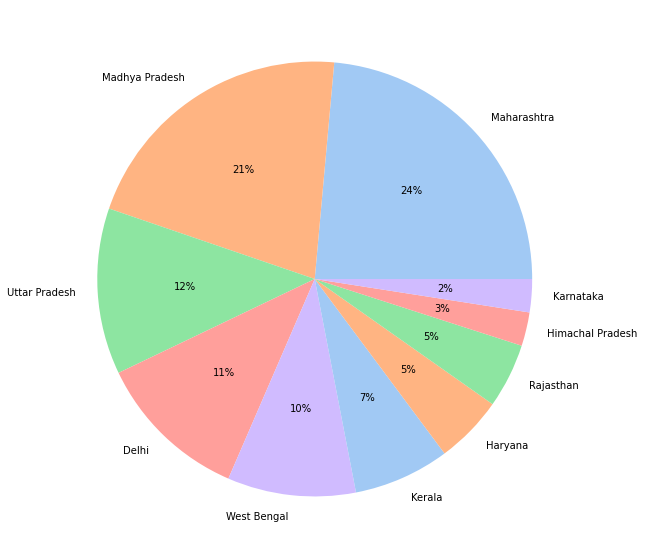

In [80]:
plt.figure(figsize=(10,10))
d = state_cont.nlargest(10, 'Profit Contribution')['Profit Contribution']
labels = state_cont.nlargest(10, 'Profit Contribution')['State']

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%')

plt.show()

Text(0.5, 1.0, 'Profit Contribution % 2019')

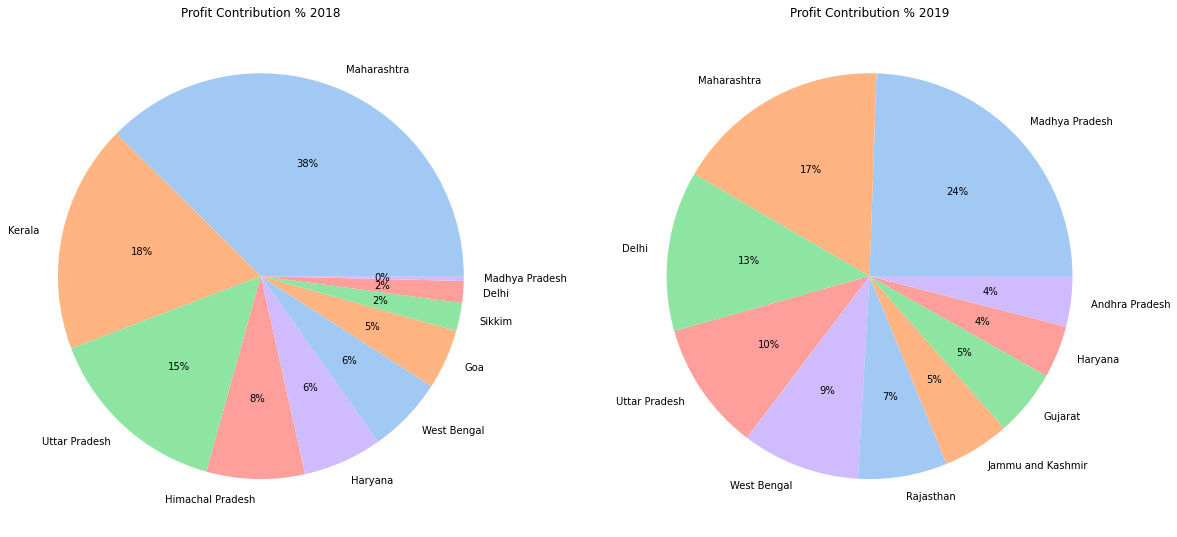

In [297]:
l18 =  sc18.nlargest(10, 'Profit Contribution')['State']
l19 =  sc19.nlargest(10, 'Profit Contribution')['State']

fig = plt.figure(figsize=(20,20))
ax1 = plt.subplot2grid((1,2),(0,0))
colors = sns.color_palette('pastel')[0:5]
plt.pie(sc18.nlargest(10, 'Profit Contribution')['Profit Contribution'], colors=colors, labels=l18, autopct='%.0f%%')
plt.title('Profit Contribution % 2018')

ax1 = plt.subplot2grid((1, 2), (0, 1))
plt.pie(sc19.nlargest(10, 'Profit Contribution')['Profit Contribution'], colors=colors, labels=l19, autopct='%.0f%%')
plt.title('Profit Contribution % 2019')


### 4. Which customer need to be focused

In [ ]:
len(data['CustomerName'].unique())

332

In [91]:
cust = data.groupby('CustomerName').sum().nlargest(40, columns=['Profit', 'Quantity'])
cust = cust.reset_index()
cust['Profit Contribution'] = cust['Profit']/abs(sum(cust['Profit'])) * 100
cust.style.background_gradient(cmap='Blues')

,CustomerName,Amount,Profit,Quantity,Profit Contribution
0,Seema,5228,1970,40,6.236151
1,Abhijeet,5691,1562,45,4.944603
2,Priyanka,5762,1340,79,4.241849
3,Abhishek,8135,1314,89,4.159544
4,Sarita,5449,1265,50,4.004432
5,Swapnil,4929,1215,49,3.846154
6,Pournamasi,2286,1027,25,3.251029
7,Gaurav,3349,1011,35,3.200380
8,Pearl,3944,995,26,3.149731
9,Vishakha,4836,966,13,3.057930


In [97]:
cust18 = data[data['Order Date'].dt.year == 2018]
cust19 = data[data['Order Date'].dt.year == 2019]

In [99]:
cust18 = cust18.groupby('CustomerName').sum().nlargest(40, columns=['Profit', 'Quantity'])
cust18 = cust18.reset_index()
cust18['Profit Contribution'] = cust18['Profit']/abs(sum(cust18['Profit'])) * 100
cust18.style.background_gradient(cmap='Blues')

,CustomerName,Amount,Profit,Quantity,Profit Contribution
0,Abhijeet,5691,1562,45,6.877422
1,Abhishek,8135,1314,89,5.785488
2,Swapnil,4929,1215,49,5.349595
3,Priyanka,3895,1021,43,4.495421
4,Pearl,3889,975,22,4.292885
5,Gaurav,3208,970,32,4.270870
6,Vishakha,4836,966,13,4.253258
7,Rohan,4901,917,50,4.037513
8,Aastha,3276,873,28,3.843783
9,Shivanshu,3266,820,25,3.610426


In [100]:
cust19 = cust19.groupby('CustomerName').sum().nlargest(40, columns=['Profit', 'Quantity'])
cust19 = cust19.reset_index()
cust19['Profit Contribution'] = cust19['Profit']/abs(sum(cust19['Profit'])) * 100
cust19.style.background_gradient(cmap='Blues')

,CustomerName,Amount,Profit,Quantity,Profit Contribution
0,Seema,5228,1970,40,8.877473
1,Sarita,5256,1219,49,5.493218
2,Parishi,4719,906,49,4.082736
3,Soumya,6849,903,52,4.069217
4,Bhishm,3758,903,22,4.069217
5,Pournamasi,1992,889,23,4.006129
6,Harshal,6026,864,25,3.893470
7,Yaanvi,8502,683,57,3.077824
8,Manju,1710,672,16,3.028255
9,Oshin,1904,660,23,2.974179


In [105]:
list(set(cust18['CustomerName']).intersection(set(cust19['CustomerName'])))

['Shubham', 'Priyanka']

### 5. Which category/sub-category contributing more to the company

In [197]:
cat = data.groupby('Category').sum().reset_index()
cat['Profit Contribution'] = cat['Profit']/abs(sum(cat['Profit'])) * 100
cat18 = (data[data['Order Date'].dt.year==2018]).groupby('Category').sum().reset_index()
cat18['Profit Contribution'] = cat18['Profit']/abs(sum(cat18['Profit'])) * 100
cat19 = (data[data['Order Date'].dt.year==2019]).groupby('Category').sum().reset_index()
cat19['Profit Contribution'] = cat19['Profit']/abs(sum(cat19['Profit'])) * 100

In [199]:
cat['pc 2018'] = cat18['Profit Contribution']
cat['pc 2019'] = cat19['Profit Contribution']

In [252]:
cat['Profit growth from 18 to 19'] = (cat['pc 2019'] - cat['pc 2018'])/abs(cat['pc 2018']) * 100

In [298]:
cat.style.background_gradient(cmap='Reds')

,Category,Amount,Profit,Quantity,Profit Contribution,pc 2018,pc 2019,Profit growth from 18 to 19
0,Clothing,139054,11163,3516,46.599875,143.968872,33.288033,-76.878312
1,Electronics,165267,10494,1154,43.807138,19.566426,39.380290,101.264609
2,Furniture,127181,2298,945,9.592987,-263.535297,27.331677,110.371164


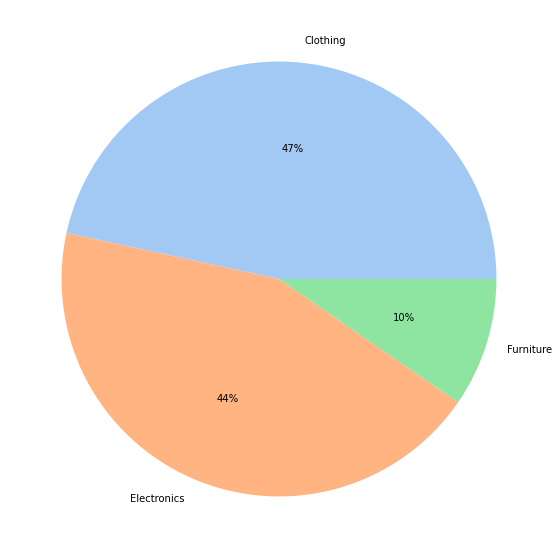

In [124]:
plt.figure(figsize=(10,10))
d = cat.nlargest(10, 'Profit Contribution')['Profit Contribution']
labels = cat.nlargest(10, 'Profit Contribution')['Category']

colors = sns.color_palette('pastel')[0:5]

#create pie chart
plt.pie(d, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

In [256]:
subc = data.groupby(['Category', 'Sub-Category']).sum().reset_index()
subc['Profit Contribution'] = round(subc['Profit']/sum(subc['Profit'])*100, 1)
sbc18 = d18.groupby(['Category', 'Sub-Category']).sum().reset_index()
sbc19 = d19.groupby(['Category', 'Sub-Category']).sum().reset_index()

In [263]:
subc['Profit 2018'] = sbc18['Profit']
subc['Profit 2019'] = sbc19['Profit']
subc['pc 18'] = subc['Profit 2018']/abs(sum(subc['Profit 2018'])) * 100
subc['pc 19'] = subc['Profit 2019']/abs(sum(subc['Profit 2019'])) * 100
subc['Profit growth% 2018 to 2019'] = (subc['Profit 2019'] - subc['Profit 2018'])/abs(subc['Profit 2018']) * 100
subc.style.background_gradient(cmap='Blues')

,Category,Sub-Category,Amount,Profit,Quantity,Profit Contribution,Profit 2018,Profit 2019,pc 18,pc 19,Profit growth% 2018 to 2019
0,Clothing,Hankerchief,14608,2098,754,8.800000,761,1337,42.301278,5.191427,75.689882
1,Clothing,Kurti,3361,181,164,0.800000,24,157,1.334074,0.609614,554.166667
2,Clothing,Leggings,2106,260,186,1.100000,44,216,2.445803,0.838705,390.909091
3,Clothing,Saree,53511,352,782,1.500000,-999,1351,-55.530850,5.245787,235.235235
4,Clothing,Shirt,7555,1131,271,4.700000,273,858,15.175097,3.331521,214.285714
5,Clothing,Skirt,1946,235,248,1.000000,45,190,2.501390,0.737749,322.222222
6,Clothing,Stole,18546,2559,671,10.700000,737,1822,40.967204,7.074629,147.218453
7,Clothing,T-shirt,7382,1500,305,6.300000,601,899,33.407449,3.490720,49.584027
8,Clothing,Trousers,30039,2847,135,11.900000,1104,1743,61.367426,6.767881,57.880435
9,Electronics,Accessories,21728,3559,262,14.900000,238,3321,13.229572,12.895084,1295.378151


C:\Users\roath\AppData\Local\Temp/ipykernel_8956/4280899877.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False).index.values, rotation=45)


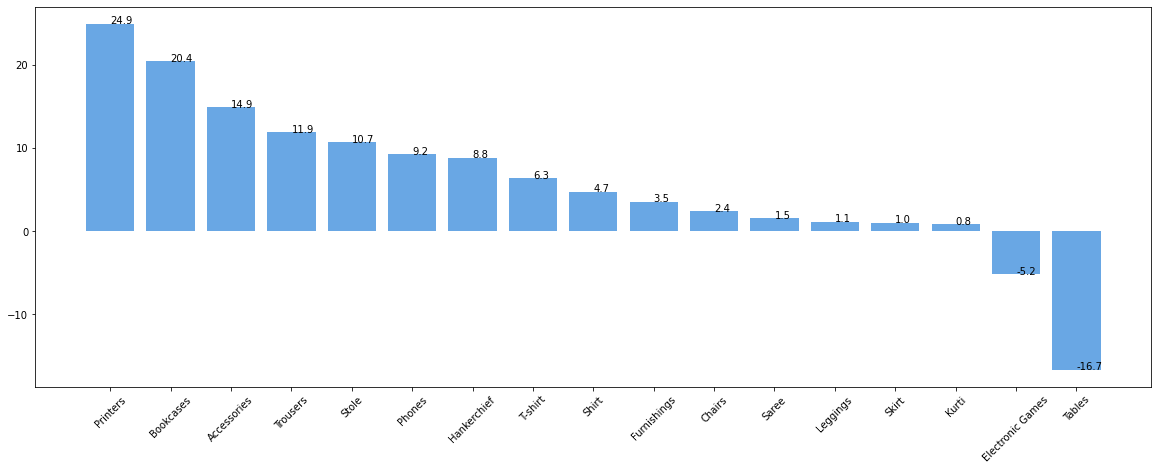

In [260]:
fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False).index.values,
       subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False),
       color='#69a7e4')
ax.set_xticklabels(subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False).index.values, rotation=45)
addlabels(subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False).index.values, subc.groupby('Sub-Category').sum()['Profit Contribution'].sort_values(ascending=False))
plt.show()

# Sales Target Analysis

In [178]:
tg['Month of Order Date'] = tg['Month of Order Date'].dt.strftime("%Y-%m")

In [179]:
tg

,Month of Order Date,Category,Target
0,2018-04,Furniture,10400
1,2018-05,Furniture,10500
2,2018-06,Furniture,10600
3,2018-07,Furniture,10800
4,2018-08,Furniture,10900
5,2018-09,Furniture,11000
6,2018-10,Furniture,11100
7,2018-11,Furniture,11300
8,2018-12,Furniture,11400
9,2019-01,Furniture,11500


In [163]:
data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category,MonthlyDate
0,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,1275,-1148,7,Furniture,Bookcases,2018-01
1,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,66,-12,5,Clothing,Stole,2018-01
2,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,8,-2,3,Clothing,Hankerchief,2018-01
3,B-25601,2018-01-04,Bharat,Gujarat,Ahmedabad,80,-56,4,Electronics,Electronic Games,2018-01
4,B-25602,2018-01-04,Pearl,Maharashtra,Pune,168,-111,2,Electronics,Phones,2018-01


In [173]:
tar = data.groupby(['MonthlyDate', 'Category']).sum().reset_index()

In [181]:
tar[(tar['MonthlyDate']=='2018-06')&(tar['Category']=='Clothing')]

,MonthlyDate,Category,Amount,Profit,Quantity
15,2018-06,Clothing,7238,-1735,244


In [182]:
targets = tg.copy()

In [183]:
def proc_tar():
    targets['actual amount'] = [0]*len(targets['Month of Order Date'])
    targets['actual profit'] = [0]*len(targets['Month of Order Date'])
    for i in range(len(targets['Month of Order Date'])):
        date = targets['Month of Order Date'][i]
        cat = targets['Category'][i]
        df = tar[(tar['MonthlyDate']==date)&(tar['Category']==cat)]
        targets['actual amount'][i] = df['Amount']
        targets['actual profit'][i] = df['Profit']

In [184]:
proc_tar()

C:\Users\roath\AppData\Local\Temp/ipykernel_8956/2678752127.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['actual amount'][i] = df['Amount']
C:\Users\roath\AppData\Local\Temp/ipykernel_8956/2678752127.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  targets['actual profit'][i] = df['Profit']


In [185]:
targets

,Month of Order Date,Category,Target,actual amount,actual profit
0,2018-04,Furniture,10400,6570,-182
1,2018-05,Furniture,10500,4677,-481
2,2018-06,Furniture,10600,3622,-930
3,2018-07,Furniture,10800,5249,-352
4,2018-08,Furniture,10900,15259,-161
5,2018-09,Furniture,11000,6728,-1344
6,2018-10,Furniture,11100,5460,890
7,2018-11,Furniture,11300,12465,2316
8,2018-12,Furniture,11400,6208,-1213
9,2019-01,Furniture,11500,15944,2137


In [186]:
targets.groupby('Category').sum()

,Target,actual amount,actual profit
Category,,,
Clothing,174000,114848,9539
Electronics,129000,134842,5221
Furniture,132900,97019,2962


In [190]:
targets[targets['Target'] < targets['actual amount']]

,Month of Order Date,Category,Target,actual amount,actual profit
4,2018-08,Furniture,10900,15259,-161
7,2018-11,Furniture,11300,12465,2316
9,2019-01,Furniture,11500,15944,2137
28,2018-08,Electronics,9000,16740,-1178
30,2018-10,Electronics,9000,15537,2741
31,2018-11,Electronics,9000,10531,378
32,2018-12,Electronics,9000,11915,2063
33,2019-01,Electronics,16000,22637,4514


In [264]:
od.corr(method='pearson').style.background_gradient(cmap='Blues')

,Amount,Profit,Quantity
Amount,1.000000,0.242045,0.352052
Profit,0.242045,1.000000,0.002441
Quantity,0.352052,0.002441,1.000000
